In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from matplotlib import rc
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import rc
rc('text', usetex=False)

In [2]:
rs = 777
np.random.seed(rs)

def load_files(in_corr_fldr, sb_fldr, N=None):
    
    # get all the files
    files = [f for f in os.listdir(os.path.join(in_corr_fldr, sb_fldr)) if f.endswith('.npy')]    
    out_file = {}
    for f in files:
        out_file[f] = np.load(os.path.join(in_corr_fldr, sb_fldr, f))
        
    all_feat = np.vstack(list(out_file.values()))
    idx = np.random.choice(range(len(all_feat)), size=np.min([N, len(all_feat)]), replace=False)
    return all_feat[idx, :]
    

# train: randm and diff
# test: obama and fake
def get_dataset(dataset, N):

    X_test = None
    y_test = None
    i = 0
    all_keys = list(dataset.keys())
    all_keys = np.sort(all_keys)
    for k in all_keys:
        
        # pick only last 20 files
        f_arr = dataset[k].copy()
                    
        if X_test is None:
            X_test = f_arr
            y_test = np.zeros((len(X_test), ))
        else:
            X_test = np.concatenate((X_test, f_arr), axis=0)
            y_test = np.concatenate((y_test, np.zeros((len(f_arr), ))+i), axis=0)
        
        print(k, i, len(dataset[k]))
        i = i+1
    
    print(f'Before {X_test.shape}')
    y_test = y_test[np.sum(np.isnan(X_test), axis=1)<1].copy()
    X_test = X_test[np.sum(np.isnan(X_test), axis=1)<1, :].copy()
    print(f'After {X_test.shape}')
    
    return X_test, y_test

def remove_keys(cur_dict):
    cur_dict.pop('__header__', None)
    cur_dict.pop('__version__', None)
    cur_dict.pop('__globals__', None)
    return cur_dict

#this one combination result
def plot_tsne(X_test, y_test, all_keys, title):

    #get datasets
    tsne = manifold.TSNE(n_components=2, perplexity=30.0,
                         early_exaggeration=12.0, learning_rate=200.0,
                         n_iter=1000, n_iter_without_progress=300,
                         min_grad_norm=1e-07, metric='euclidean',
                         init='random', verbose=0, random_state=rs,
                         method='barnes_hut', angle=0.5)
    print('tsne train {}'.format(X_test.shape))
    Y = tsne.fit_transform(X_test)

    colormap = plt.cm.tab20 #nipy_spectral #, Set1,Paired
    colorst = [colormap(i) for i in np.linspace(0, 1, len(all_keys))]

    fig, ax = plt.subplots(figsize=(10, 10))
    for k in range(len(all_keys)):
        plt.scatter(Y[y_test==k, 0], Y[y_test==k, 1],
                    label=r'{}'.format(all_keys[k]), alpha=0.7, facecolors=colorst[k])

    #plt.legend(prop={'size': 18}, loc='upper center', 
    #           bbox_to_anchor=(0.5, 1.2), ncol=3,
    #           fancybox=True, shadow=False)
    plt.xticks([])
    plt.yticks([])
    ax.axis('off')
    plt.tight_layout(pad=5, h_pad=None, w_pad=None, rect=None)
    plt.title(title)
    plt.savefig(f'tsne_plots/{title}.png')
    plt.show()

In [3]:
def tsne_one_feat(feat_fldr, data_keys, data_names, N, ncomp, title):
    dataset = {}
    for f in range(len(data_names)):
        dataset[data_names[f]] = load_files(feat_fldr, data_keys[f], N)

    X_test, y_test = get_dataset(dataset, N)
    plot_tsne(X_test[:, :ncomp], y_test, np.sort(data_names), title)

In [4]:
# dictionary
data_keys = ['bo', 'bs', 'br', 'ew', 'dt', 'hc', 'jb', 'pb', 'kh', 'cb', 
             'FF_orig', 'bo_faceswap', 'bs_faceswap', 'ew_faceswap', 'dt_faceswap', 'hc_faceswap']
data_names = ['Barack Obama', 'Bernie Sanders', 'Bete O Rourke', 'Elizabeth Warren', 
             'Donald J. Trump', 'Hillary Clinton', 'Joe Biden', 'Pete Buttigieg', 
             'Kamala Harris', 'Cory Booker', 'FaceForensics', 
              'bo face-swaps', 'bs face-swaps', 'ew face-swaps', 'dt face-swaps', 'hc face-swaps']


N_test = 1000


In [ ]:
tsne_one_feat('/data/home/shruti/voxceleb/fabnet_corr_100_pca2000/', data_keys, data_names, N_test, ncomp=190, title='FabNet Corr')



Barack Obama 0 1000
Bernie Sanders 1 1000
Bete O Rourke 2 1000
Cory Booker 3 1000
Donald J. Trump 4 1000
Elizabeth Warren 5 1000
FaceForensics 6 1000
Hillary Clinton 7 1000
Joe Biden 8 1000
Kamala Harris 9 1000
Pete Buttigieg 10 1000
bo face-swaps 11 1000
bs face-swaps 12 1000
dt face-swaps 13 1000
ew face-swaps 14 671
hc face-swaps 15 1000
Before (15671, 190)
After (9733, 190)
tsne train (9733, 190)


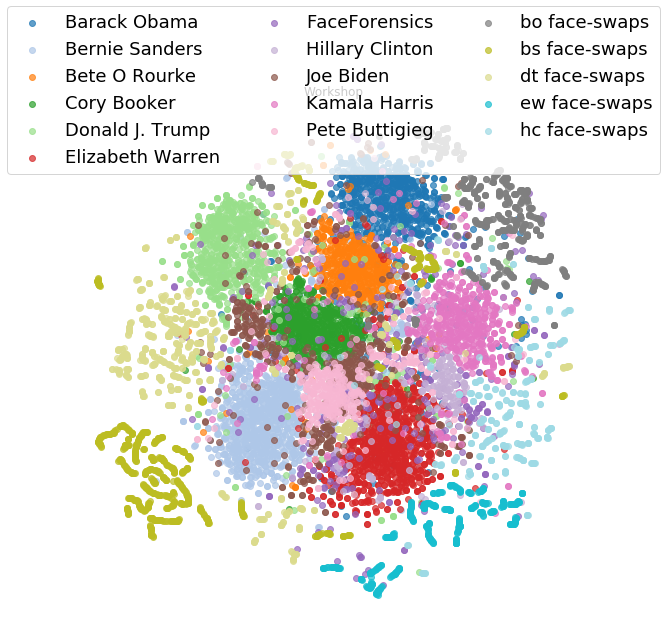

In [11]:
tsne_one_feat('/data/home/shruti/voxceleb/aus_corr_100/', data_keys, data_names, N=N_test, ncomp=190, title='Workshop')


In [ ]:
tsne_one_feat('/data/home/shruti/voxceleb/fabnet_corr_100_pca2000/', data_keys, N=N_test, ncomp=256, title='fabnet corr 256')


Barack Obama 0 1000
Bernie Sanders 1 1000
Bete O Rourke 2 1000
Cory Booker 3 1000
Donald J. Trump 4 1000
Elizabeth Warren 5 1000
FaceForensics 6 1000
Hillary Clinton 7 1000
Joe Biden 8 1000
Kamala Harris 9 1000
Pete Buttigieg 10 1000
bo face-swaps 11 1000
bs face-swaps 12 1000
dt face-swaps 13 1000
ew face-swaps 14 671
hc face-swaps 15 1000
Before (15671, 512)
After (15671, 512)
tsne train (15671, 512)


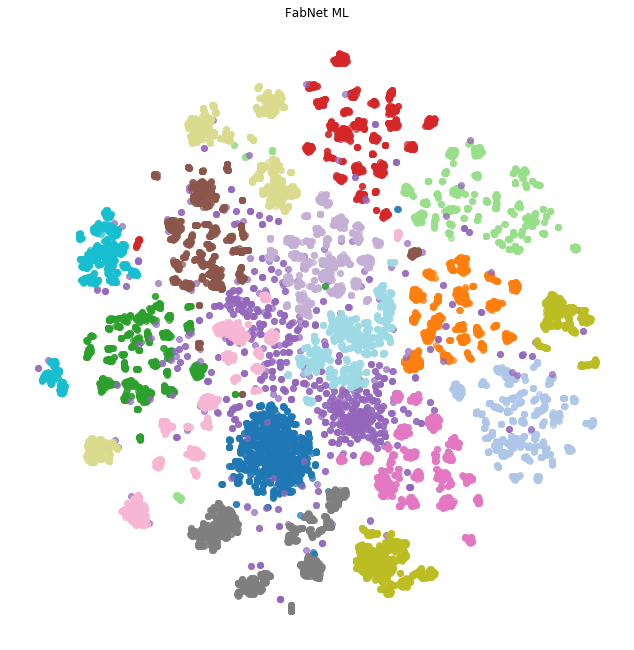

In [6]:

tsne_one_feat('/data/home/shruti/voxceleb/fabnet_metric/', data_keys, data_names, N_test, ncomp=512, title='FabNet ML')


Barack Obama 0 1000
Bernie Sanders 1 1000
Bete O Rourke 2 1000
Cory Booker 3 1000
Donald J. Trump 4 1000
Elizabeth Warren 5 1000
FaceForensics 6 1000
Hillary Clinton 7 1000
Joe Biden 8 1000
Kamala Harris 9 1000
Pete Buttigieg 10 1000
bo face-swaps 11 1000
bs face-swaps 12 1000
dt face-swaps 13 1000
ew face-swaps 14 821
hc face-swaps 15 1000
Before (15821, 512)
After (15821, 512)
tsne train (15821, 512)


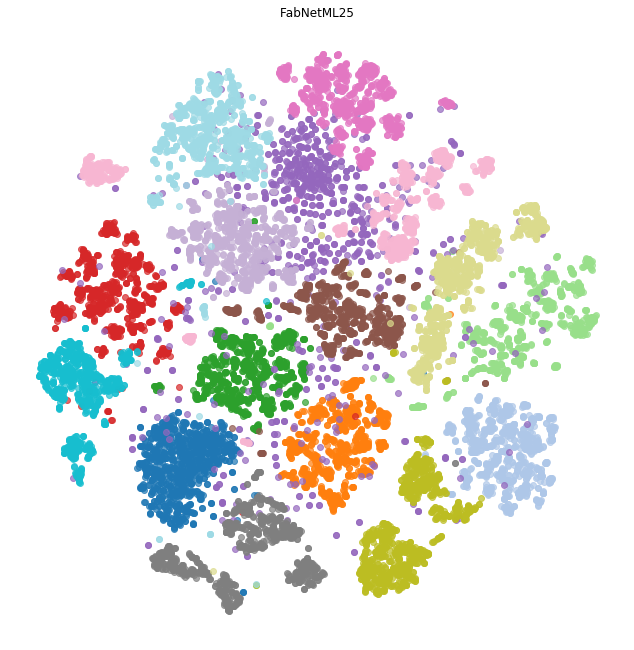

In [5]:

tsne_one_feat('/data/home/shruti/voxceleb/fabnet_metric25/', data_keys, data_names, N_test, ncomp=512, title='FabNetML25')


Barack Obama 0 1000
Bernie Sanders 1 1000
Bete O Rourke 2 1000
Cory Booker 3 1000
Donald J. Trump 4 1000
Elizabeth Warren 5 1000
FaceForensics 6 1000
Hillary Clinton 7 1000
Joe Biden 8 1000
Kamala Harris 9 1000
Pete Buttigieg 10 1000
bo face-swaps 11 1000
bs face-swaps 12 1000
dt face-swaps 13 1000
ew face-swaps 14 771
hc face-swaps 15 1000
Before (15771, 512)
After (15771, 512)
tsne train (15771, 512)


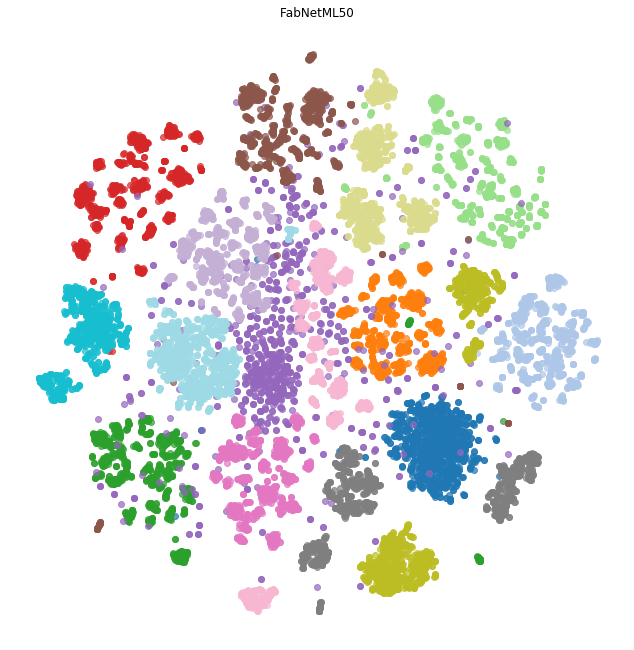

In [6]:

tsne_one_feat('/data/home/shruti/voxceleb/fabnet_metric50/', data_keys, data_names, N_test, ncomp=512, title='FabNetML50')


Barack Obama 0 1000
Bernie Sanders 1 1000
Bete O Rourke 2 1000
Cory Booker 3 1000
Donald J. Trump 4 1000
Elizabeth Warren 5 1000
FaceForensics 6 1000
Hillary Clinton 7 1000
Joe Biden 8 1000
Kamala Harris 9 1000
Pete Buttigieg 10 1000
bo face-swaps 11 1000
bs face-swaps 12 1000
dt face-swaps 13 1000
ew face-swaps 14 721
hc face-swaps 15 1000
Before (15721, 512)
After (15721, 512)
tsne train (15721, 512)


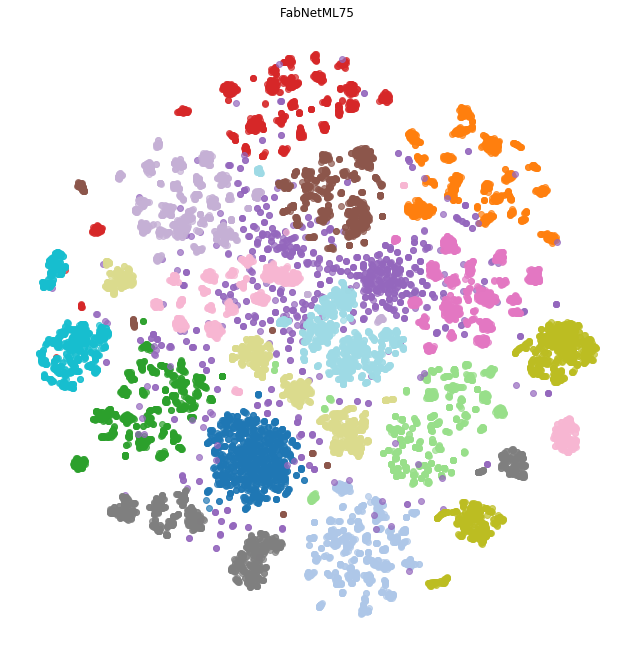

In [7]:

tsne_one_feat('/data/home/shruti/voxceleb/fabnet_metric75/', data_keys, data_names, N_test, ncomp=512, title='FabNetML75')


Barack Obama 0 1000
Bernie Sanders 1 1000
Bete O Rourke 2 1000
Cory Booker 3 1000
Donald J. Trump 4 1000
Elizabeth Warren 5 1000
FaceForensics 6 1000
Hillary Clinton 7 1000
Joe Biden 8 1000
Kamala Harris 9 1000
Pete Buttigieg 10 1000
bo face-swaps 11 1000
bs face-swaps 12 690
dt face-swaps 13 1000
ew face-swaps 14 428
hc face-swaps 15 1000
Before (15118, 2048)
After (15118, 2048)
tsne train (15118, 512)


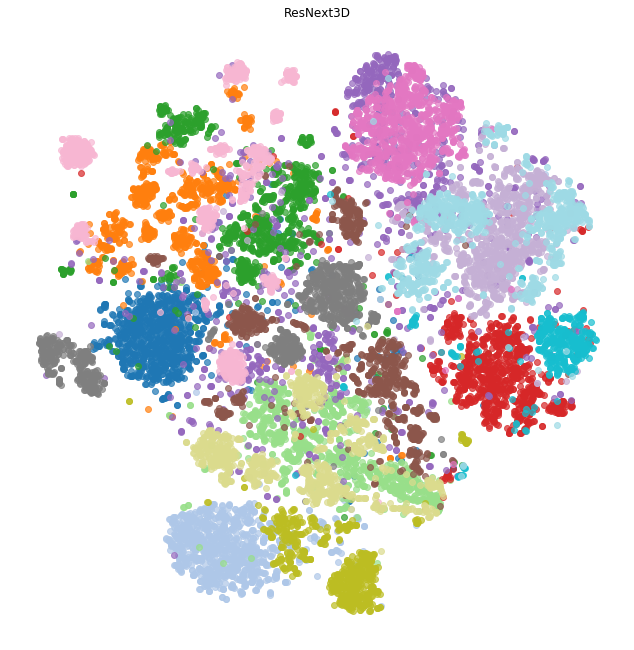

In [13]:

tsne_one_feat('/data/home/shruti/voxceleb/resnet3D/leaders/', data_keys, data_names, N_test, ncomp=512, title='ResNext3D')


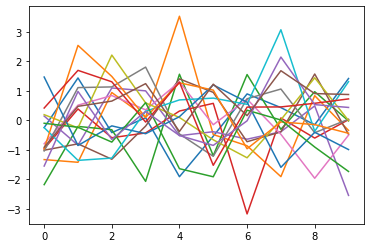

<Figure size 216x144 with 0 Axes>

In [12]:

import pylab
fig = pylab.figure()
figlegend = pylab.figure(figsize=(3,2))
ax = fig.add_subplot(111)


for k in np.sort(data_names):
    ax.plot(range(10), pylab.randn(10), label=k)

figlegend.legend(prop={'size': 18}, loc='center', 
                 bbox_to_anchor=(0.5, 1.2), ncol=3,
                 fancybox=True, shadow=False)
fig.show()
figlegend.show()
figlegend.savefig('tsne_plots/legend.png')
